# Lab 1 - Clusters and Classification Boundaries

### Functions and Setup

Below is the code to setup the x,y space
Below is the code to generate an ellipse with rotation theta

In [74]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0) 

In [75]:
def ellipse(mean, eigenvalues, theta, points):
    a = np.sqrt(eigenvalues[0])
    b = np.sqrt(eigenvalues[1])
    h = mean[0]
    k = mean[1]
    angle = theta*np.pi/180
    
    t = np.linspace(0, 2*np.pi, points)
    
    x = a*np.cos(t)
    y = b*np.sin(t)
    
    x_prime = x*np.cos(theta) - y*np.sin(theta) + h
    y_prime = x*np.sin(theta) - y*np.cos(theta) + k
    
    return x_prime,y_prime

In [244]:
##-------------------------GENERATE CLASS A DATA-------------------------##
n_a = 200
mu_a = np.array([5, 10])
cov_a = np.array([[8, 0], [0, 4]])
#generate random normal samples in 2D space (normal vs multivariate_normal)
a_samples = np.random.multivariate_normal(mu_a, cov_a, n_a)
a_test = np.random.multivariate_normal(mu_a, cov_a, n_a)
eigval_a, eigvec_a = np.linalg.eig(cov_a)
theta1a = np.arctan(eigvec_a[1][0]/eigvec_a[0][0])
#theta2a = np.arctan(eigvec_a[1][1]/eigvec_a[0][1])
#print(theta1a,theta2a)

##-------------------------GENERATE CLASS B DATA-------------------------##
n_b = 200
mu_b = np.array([10, 15])
cov_b = np.array([[8, 0], [0, 4]])
b_samples = np.random.multivariate_normal(mu_b, cov_b, n_b)
b_test = np.random.multivariate_normal(mu_b, cov_b, n_b)
eigval_b, eigvec_b = np.linalg.eig(cov_b)
theta1b = np.arctan(eigvec_b[1][0]/eigvec_b[0][0])
#theta2b = np.arctan(eigvec_b[1][1]/eigvec_b[0][1])
#print(theta1b,theta2b)

##-------------------------GENERATE CLASS C DATA-------------------------##
n_c = 100
mu_c = np.array([5, 10])
cov_c = np.array([[8, 4], [4, 40]])
c_samples = np.random.multivariate_normal(mu_c, cov_c, n_c)
c_test = np.random.multivariate_normal(mu_c, cov_c, n_c)
eigval_c, eigvec_c = np.linalg.eig(cov_c)
theta1c = np.arctan(eigvec_c[1][0]/eigvec_c[0][0])
theta2c = np.arctan(eigvec_c[1][1]/eigvec_c[0][1])
c1 = eigval_c[0]
c2 = eigval_c[1]
#print(theta1c,theta2c)


##-------------------------GENERATE CLASS D DATA-------------------------##
n_d = 200
mu_d = np.array([15, 10])
cov_d = np.array([[8, 0], [0, 8]])
d_samples = np.random.multivariate_normal(mu_d, cov_d, n_d)
d_test = np.random.multivariate_normal(mu_d, cov_d, n_d)
eigval_d, eigvec_d = np.linalg.eig(cov_d)
theta1d = np.arctan(eigvec_d[1][0]/eigvec_d[0][0])
#theta2d = np.arctan(eigvec_d[1][1]/eigvec_d[0][1])
#print(theta1d,theta2d)

##-------------------------GENERATE CLASS E DATA-------------------------##
n_e = 150
mu_e = np.array([10, 5])
cov_e = np.array([[10, -5], [-5, 20]])
e_samples = np.random.multivariate_normal(mu_e, cov_e, n_e)
e_test = np.random.multivariate_normal(mu_e, cov_e, n_e)
eigval_e, eigvec_e = np.linalg.eig(cov_e)
theta1e = np.arctan(eigvec_e[1][0]/eigvec_e[0][0])
theta2e = np.arctan(eigvec_e[1][1]/eigvec_e[0][1])
#print(theta1e,theta2e)
e1 = eigval_e[0]
e2 = eigval_e[1]
#print(eigval_e)
#print(eigvec_e[:,1])
#print(eigvec_e)
#theta1 will be the eigenvector for the horizontal axis


##------------------------GENERATE CLASS ELLIPSES------------------------##
ellipse_a_x, ellipse_a_y = ellipse(mu_a, eigval_a, theta1a, 100)
ellipse_b_x, ellipse_b_y = ellipse(mu_b, eigval_b, theta1b, 100)

ellipse_c_x, ellipse_c_y = ellipse(mu_c, [c2, c1], theta2c, 100)
ellipse_d_x, ellipse_d_y = ellipse(mu_d, eigval_d, theta1d, 100)
ellipse_e_x, ellipse_e_y = ellipse(mu_e, [e2, e1], theta2e, 100)

#NOTE: still not 100% sure which theta to use for c and e

Generate grids

In [245]:
#create x,y grid for Case 1 
X1 = np.concatenate((a_samples,b_samples), axis = 0)
h1 = .05
x1_min, x1_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y1_min, y1_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1

xx1, yy1 = np.meshgrid(np.arange(x1_min, x1_max, h1),
                     np.arange(y1_min, y1_max, h1))
#plt.plot(xx1, yy1, marker='.', color='k', linestyle='none');


#create x,y grid for Case 2
X2 = np.concatenate((c_samples,d_samples,e_samples), axis = 0)
h2 = .05
x2_min, x2_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y2_min, y2_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1

xx2, yy2 = np.meshgrid(np.arange(x2_min, x2_max, h2),
                     np.arange(y2_min, y2_max, h2))
#plt.plot(xx2, yy2, marker='.', color='k', linestyle='none');


### 2 - Generating Clusters

Below is the code to plot the samples in both cases 1 and 2, with standard deviation contours as well as means

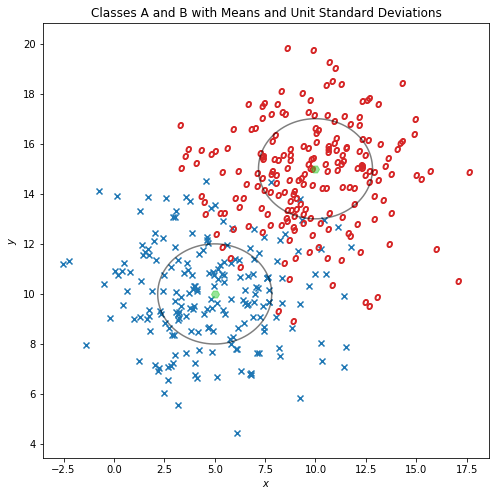

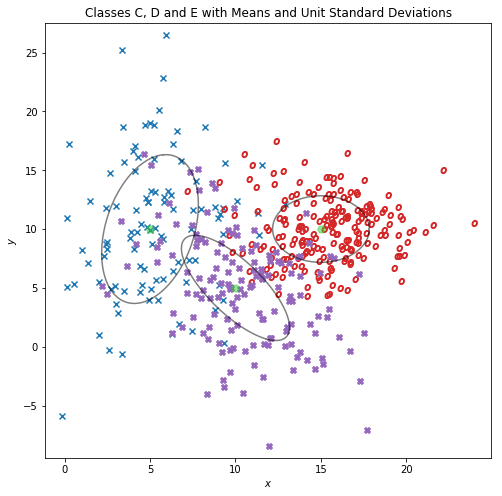

In [5]:
##---------Plot the classes for case 1---------##
plt.figure(0, figsize=(8,8))
plt.scatter(a_samples[:, 0], a_samples[:, 1], marker='x');
plt.scatter(b_samples[:, 0], b_samples[:, 1], c='tab:red', marker='$o$')

plt.plot(mu_a[0], mu_a[1], c='limegreen', marker='H', markersize=8, alpha=0.5)
plt.plot(mu_b[0], mu_b[1], c='limegreen', marker='H', markersize=8, alpha=0.5)
plt.plot(ellipse_a_x, ellipse_a_y, color='k', alpha=0.5)
plt.plot(ellipse_b_x, ellipse_b_y, color='k', alpha=0.5)
plt.title("Classes A and B with Means and Unit Standard Deviations")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim([x1_min, x1_max])
plt.ylim([y1_min, y1_max]);


##---------Plot the classes for case 2---------##
plt.figure(1, figsize=(8,8))
plt.scatter(c_samples[:, 0], c_samples[:, 1], marker='x');
plt.scatter(d_samples[:, 0], d_samples[:, 1], c='tab:red', marker='$o$')
plt.scatter(e_samples[:, 0], e_samples[:, 1], c='tab:purple', marker='X')

plt.plot(mu_c[0], mu_c[1], c='limegreen', marker='H', markersize=8, alpha=0.5)
plt.plot(mu_d[0], mu_d[1], c='limegreen', marker='H', markersize=8, alpha=0.5)
plt.plot(mu_e[0], mu_e[1], c='limegreen', marker='H', markersize=8, alpha=0.5)

plt.plot(ellipse_c_x, ellipse_c_y, color='k', alpha=0.5)
plt.plot(ellipse_d_x, ellipse_d_y, color='k', alpha=0.5)
plt.plot(ellipse_e_x, ellipse_e_y, color='k', alpha=0.5)

plt.title("Classes C, D and E with Means and Unit Standard Deviations")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim([x2_min, x2_max])
plt.ylim([y2_min, y2_max]);

## Part 3 

### MED : Case 1

In [259]:
def MED(mu_a, mu_b, X, Y):
    dist = np.zeros((len(X), len(X[0])), dtype=np.int)
    #print(len(dist), len(dist[0]))
    for i in range(len(X)):
        for j in range(len(X[0])):
            classifier = [X[i,j], Y[i,j]]
            #print(i, j, classifier, mu_a, mu_b)
            a = np.linalg.norm(classifier-mu_a) #set 1
            b = np.linalg.norm(classifier-mu_b) #set 2
            if a < b:
                dist[i,j] = -1
            elif b < a:
                dist[i,j] = 1
    return dist

MED_dist = MED(mu_a, mu_b, xx1, yy1)

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:909: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'edgecolors'
  s)


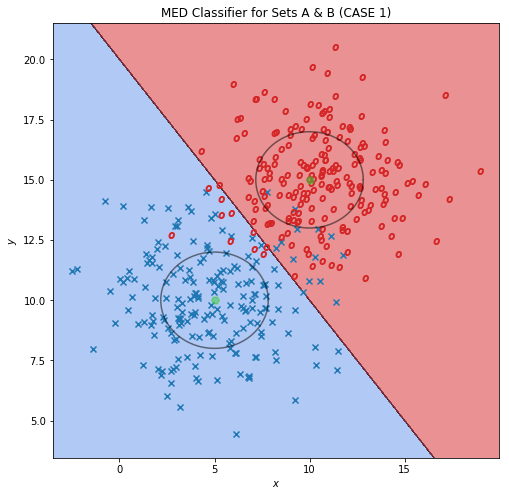

In [239]:
plt.figure(2, figsize=(8,8))
plt.contourf(xx1,yy1,MED_dist, edgecolors='face', linewidths='10', alpha=0.5, colors=('cornflowerblue', 'k', 'tab:red', 'k'))
plt.scatter(a_samples[:, 0], a_samples[:, 1], marker='x');
plt.scatter(b_samples[:, 0], b_samples[:, 1], c='tab:red', marker='$o$')
plt.plot(mu_a[0], mu_a[1], c='limegreen', marker='H', markersize=8, alpha=0.5)
plt.plot(mu_b[0], mu_b[1], c='limegreen', marker='H', markersize=8, alpha=0.5)
plt.plot(ellipse_a_x, ellipse_a_y, color='k', alpha=0.5)
plt.plot(ellipse_b_x, ellipse_b_y, color='k', alpha=0.5)
plt.title("MED Classifier for Sets A & B (CASE 1)")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim([x1_min, x1_max])
plt.ylim([y1_min, y1_max]);

### MED : Case 2

In [151]:
def MED_3(mu_1, mu_2, mu_3, X, Y):
    dist = np.zeros((len(X), len(X[0])), dtype=np.int)
    for i in range(len(X)):
        for j in range(len(X[0])):
            classifier = [X[i,j], Y[i,j]]
            #print(i, j, classifier, mu_a, mu_b)
            a = np.linalg.norm(classifier-mu_1) #class 1
            b = np.linalg.norm(classifier-mu_2) #class 2
            c = np.linalg.norm(classifier-mu_3) #class 3
            values = [a, b, c]
            index_min = np.argmin(values)
            
            #class 1 
            if (index_min==0):
                dist[i,j] = -1
            #class 2
            elif (index_min==1):
                dist[i,j] = 2
            #class 3
            elif (index_min==2):
                dist[i,j] = 3
    return dist

MED_dist2 = MED_3(mu_c, mu_d, mu_e, xx2, yy2)

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:909: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'edgecolors'
  s)


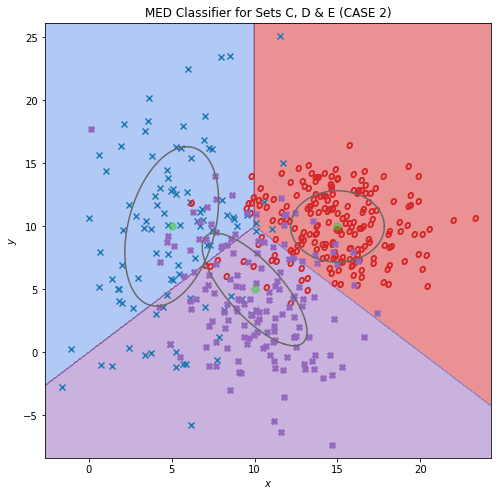

In [116]:
plt.figure(3, figsize=(8,8))
plt.contourf(xx2, yy2, MED_dist2, colors=('cornflowerblue', 'tab:purple', 'tab:red'), edgecolors='face', linewidths='10', alpha=0.5)
plt.scatter(c_samples[:, 0], c_samples[:, 1], marker='x');
plt.scatter(d_samples[:, 0], d_samples[:, 1], c='tab:red', marker='$o$')
plt.scatter(e_samples[:, 0], e_samples[:, 1], c='tab:purple', marker='X')

plt.plot(mu_c[0], mu_c[1], c='limegreen', marker='H', markersize=8, alpha=0.5)
plt.plot(mu_d[0], mu_d[1], c='limegreen', marker='H', markersize=8, alpha=0.5)
plt.plot(mu_e[0], mu_e[1], c='limegreen', marker='H', markersize=8, alpha=0.5)

plt.plot(ellipse_c_x, ellipse_c_y, color='dimgrey')
plt.plot(ellipse_d_x, ellipse_d_y, color='dimgrey')
plt.plot(ellipse_e_x, ellipse_e_y, color='dimgrey')

plt.title("MED Classifier for Sets C, D & E (CASE 2)")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim([x2_min, x2_max])
plt.ylim([y2_min, y2_max]);

### GED : Case 1

In [248]:
def GED_Distance(classifier, mean, std):
    result = np.matmul((classifier-mean), np.linalg.inv(std))
    result1 = np.matmul(result, np.transpose(classifier-mean))
    return np.sqrt(result1)

In [263]:
def GED(mu_a, mu_b, std_a, std_b, X, Y):
    dist = np.zeros((len(X), len(X[0])), dtype=np.int)
    #print(len(dist), len(dist[0]))
    for i in range(len(X)):
        for j in range(len(X[0])):
            classifier = [X[i,j], Y[i,j]]
            #print(i, j, classifier, mu_a, mu_b)
            a = GED_Distance(classifier, mu_a, std_a) #set 1
            b = GED_Distance(classifier, mu_b, std_b) #set 2
            if a<b:
                dist[i,j] = -1
            elif b<a:
                dist[i,j] = 2
    return dist

GED_dist = GED(mu_a, mu_b, cov_a, cov_b, xx1, yy1)

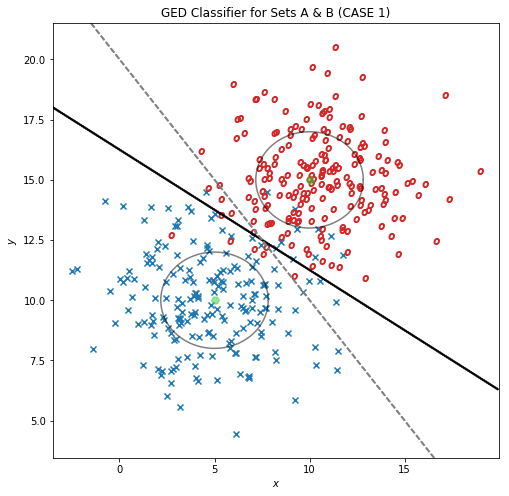

In [141]:
plt.figure(2, figsize=(8,8))
plt.contour(xx1, yy1, GED_dist, alpha=0.5, linestyles='solid', colors=('black'))
plt.contour(xx1, yy1, MED_dist, alpha=0.5, colors=('gray'))
plt.contour(xx1, yy1, MED_dist, alpha=0.5, colors=('gray'))
plt.scatter(a_samples[:, 0], a_samples[:, 1], marker='x');
plt.scatter(b_samples[:, 0], b_samples[:, 1], c='tab:red', marker='$o$')
plt.plot(mu_a[0], mu_a[1], c='limegreen', marker='H', markersize=8, alpha=0.5)
plt.plot(mu_b[0], mu_b[1], c='limegreen', marker='H', markersize=8, alpha=0.5)
plt.plot(ellipse_a_x, ellipse_a_y, color='k', alpha=0.5)
plt.plot(ellipse_b_x, ellipse_b_y, color='k', alpha=0.5)
plt.title("GED Classifier for Sets A & B (CASE 1)")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim([x1_min, x1_max])
plt.ylim([y1_min, y1_max]);

### GED: Case 2

In [152]:
def GED_3(mu_1, mu_2, mu_3, std_1, std_2, std_3, X, Y):
    dist = np.zeros((len(X), len(X[0])), dtype=np.int)
    #print(len(dist), len(dist[0]))
    for i in range(len(X)):
        for j in range(len(X[0])):
            classifier = [X[i,j], Y[i,j]]
            #print(i, j, classifier, mu_a, mu_b)
            a = GED_Distance(classifier, mu_1, std_1) #set 1
            b = GED_Distance(classifier, mu_2, std_2) #set 2
            c = GED_Distance(classifier, mu_3, std_3)
            
            values = [a, b, c]
            index_min = np.argmin(values)
            
            #class 1 
            if (index_min==0):
                dist[i,j] = -1
            #class 2
            elif (index_min==1):
                dist[i,j] = 2
            #class 3
            elif (index_min==2):
                dist[i,j] = 3
    return dist

GED_dist2 = GED_3(mu_c, mu_d, mu_e, cov_c, cov_d, cov_e, xx2, yy2)

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:909: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'edgecolors'
  s)


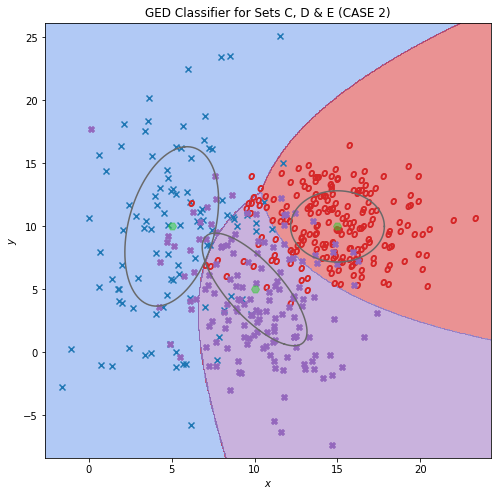

In [226]:
plt.figure(3, figsize=(8,8))
plt.contourf(xx2, yy2, GED_dist2, colors=('cornflowerblue', 'tab:purple', 'tab:red'), edgecolors='face', linewidths='10', alpha=0.5)
plt.scatter(c_samples[:, 0], c_samples[:, 1], marker='x');
plt.scatter(d_samples[:, 0], d_samples[:, 1], c='tab:red', marker='$o$')
plt.scatter(e_samples[:, 0], e_samples[:, 1], c='tab:purple', marker='X')

plt.plot(mu_c[0], mu_c[1], c='limegreen', marker='H', markersize=8, alpha=0.5)
plt.plot(mu_d[0], mu_d[1], c='limegreen', marker='H', markersize=8, alpha=0.5)
plt.plot(mu_e[0], mu_e[1], c='limegreen', marker='H', markersize=8, alpha=0.5)

plt.plot(ellipse_c_x, ellipse_c_y, color='dimgrey')
plt.plot(ellipse_d_x, ellipse_d_y, color='dimgrey')
plt.plot(ellipse_e_x, ellipse_e_y, color='dimgrey')

plt.title("GED Classifier for Sets C, D & E (CASE 2)")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim([x2_min, x2_max])
plt.ylim([y2_min, y2_max]);


## NN 

### Case 1

In [173]:
def minDistance(point, class1, class2):
    len1 = len(class1)
    len2 = len(class2)
    #len3 = len(class3)
    #if (len3!=0):
     #   data = np.concatenate((class1,class2,class3), axis = 0)
    #else:
    data = np.concatenate((class1,class2), axis = 0)
        
    distance = []
    class_number = 0
    
    for i, d in enumerate(data):
        distance.append(np.linalg.norm(point-d))

    index_min = np.argmin(distance)
    
    if (index_min<len1):
        class_number=0
    elif (index_min>=len1)&(index_min<(len1+len2)):
        class_number=1
    else:
        class_number=2

    
    #return data[index_min], distance[index_min], index_min, class_number
    return class_number

p=[10,5]
x= minDistance(p, a_samples, b_samples)
print(x)

0


In [174]:
def NN(class1, class2, X, Y):
    dist = np.zeros((len(X), len(X[0])), dtype=np.int)
    for i in range(len(X)):
        for j in range(len(X[0])):
            classifier = [X[i,j], Y[i,j]]
            n = minDistance(classifier, class1, class2)
            dist[i,j] = n

    return dist

NN_dist = NN(a_samples, b_samples, xx1, yy1)


/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:909: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'edgecolors'
  s)


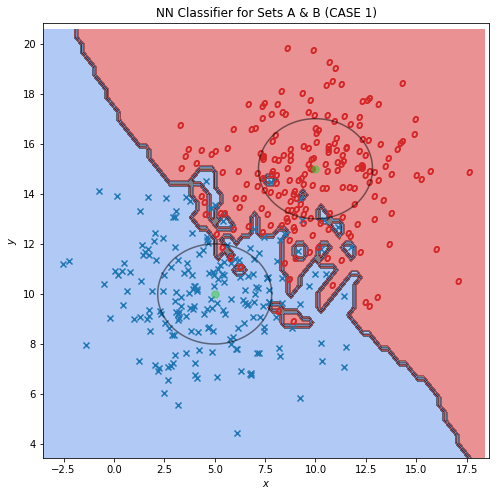

In [55]:
plt.figure(2, figsize=(8,8))
plt.contourf(xx1,yy1, NN_dist, edgecolors='face', linewidths='10', alpha=0.5, colors=('cornflowerblue', 'k', 'tab:red', 'k'))
plt.scatter(a_samples[:, 0], a_samples[:, 1], marker='x');
plt.scatter(b_samples[:, 0], b_samples[:, 1], c='tab:red', marker='$o$')
plt.plot(mu_a[0], mu_a[1], c='limegreen', marker='H', markersize=8, alpha=0.5)
plt.plot(mu_b[0], mu_b[1], c='limegreen', marker='H', markersize=8, alpha=0.5)
plt.plot(ellipse_a_x, ellipse_a_y, color='k', alpha=0.5)
plt.plot(ellipse_b_x, ellipse_b_y, color='k', alpha=0.5)
plt.title("NN Classifier for Sets A & B (CASE 1)")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim([x1_min, x1_max])
plt.ylim([y1_min, y1_max]);

## NN 

### Case 2

In [194]:

def minDistance_3(point, class1, class2, class3):
    len1 = len(class1)
    len2 = len(class2)
    len3 = len(class3)

    data = np.concatenate((class1,class2,class3), axis = 0)
      
    distance = []
    class_number = 0

    for i, d in enumerate(data):
        distance.append(np.linalg.norm(point-d))
        
    

    index_min = np.argmin(distance)

    if (index_min<len1):
        class_number=-1
    elif (index_min>=len1)&(index_min<(len1+len2)):
        class_number=2
    elif (index_min>=(len1+len2))&(index_min<(len1+len2+len3)):
        class_number=3
    else:
        class_number=0


    #return data[index_min], distance[index_min], index_min, class_number
    return class_number

p=[15,1]
x= minDistance_3(p, c_samples, d_samples, e_samples)
print(x)

3


In [195]:
def NN_3(class1, class2, class3, X, Y):
    dist = np.zeros((len(X), len(X[0])), dtype=np.int)
    for i in range(len(X)):
        for j in range(len(X[0])):
            classifier = [X[i,j], Y[i,j]]
            n = minDistance_3(classifier, class1, class2, class3)
            dist[i,j] = n

    return dist

NN_dist_3 = NN_3(c_samples, d_samples, e_samples, xx2, yy2)


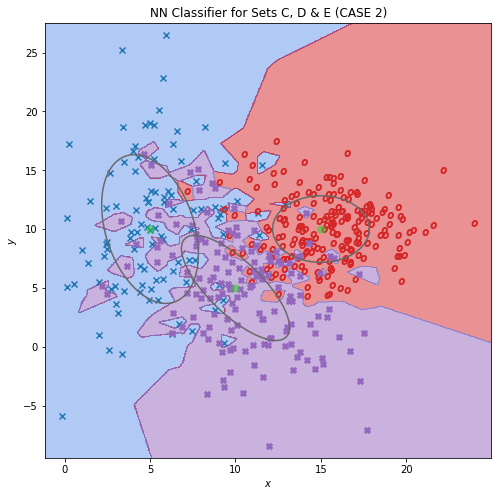

In [76]:
plt.figure(3, figsize=(8,8))
plt.contourf(xx2, yy2, NN_dist_3, colors=('cornflowerblue','tab:purple', 'tab:red' ), edgecolors='face', linewidths='10', alpha=0.5)
plt.scatter(c_samples[:, 0], c_samples[:, 1], marker='x');
plt.scatter(d_samples[:, 0], d_samples[:, 1], c='tab:red', marker='$o$')
plt.scatter(e_samples[:, 0], e_samples[:, 1], c='tab:purple', marker='X')

plt.plot(mu_c[0], mu_c[1], c='limegreen', marker='H', markersize=8, alpha=0.5)
plt.plot(mu_d[0], mu_d[1], c='limegreen', marker='H', markersize=8, alpha=0.5)
plt.plot(mu_e[0], mu_e[1], c='limegreen', marker='H', markersize=8, alpha=0.5)

plt.plot(ellipse_c_x, ellipse_c_y, color='dimgrey')
plt.plot(ellipse_d_x, ellipse_d_y, color='dimgrey')
plt.plot(ellipse_e_x, ellipse_e_y, color='dimgrey')

plt.title("NN Classifier for Sets C, D & E (CASE 2)")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim([x2_min, x2_max])
plt.ylim([y2_min, y2_max]);

## Part 3 

### MAP : Case 1

In [143]:
def MAP(mu_a, mu_b, std_a, std_b, num_a, num_b, X, Y):
    
    pb = np.matmul(mu_b,np.linalg.inv(std_b))
    pa = np.matmul(mu_a,np.linalg.inv(std_a))
    Q0 = np.linalg.inv(std_a) - np.linalg.inv(std_b)
    Q1 = 2*(pb-pa)
    Q2 = np.matmul(pa,np.transpose(mu_a))- np.matmul(pb,np.transpose(mu_b))
    Q3 = np.log(num_b/num_a)
    Q4 = np.log(np.linalg.det(std_a)/np.linalg.det(std_b))
    
    dist = np.zeros((len(X), len(X[0])), dtype=np.int)
    #print(len(dist), len(dist[0]))
    for i in range(len(X)):
        for j in range(len(X[0])):
            classifier = [X[i,j], Y[i,j]]
            #print(i, j, classifier, mu_a, mu_b)
            p = np.matmul(classifier,Q0)
            val = np.matmul(p,np.transpose(classifier)) + np.matmul(Q1,np.transpose(classifier)) + Q2 + (2*Q3) + Q4
            if val < 0:
                dist[i,j] = 0
            else:
                dist [i,j] = 1
                
            
    return dist

MAP_val1 = MAP(mu_a, mu_b, cov_a, cov_b, n_a, n_b, xx1, yy1)

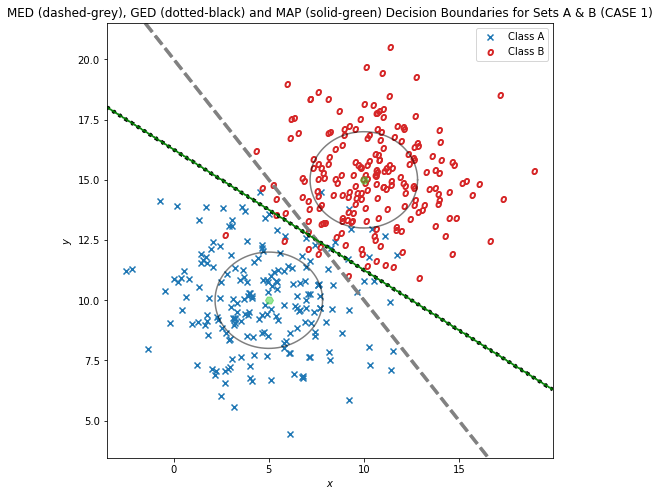

In [224]:
plt.figure(2, figsize=(8,8))
plt.contour(xx1, yy1, GED_dist, alpha=0.5, linewidths=3, linestyles='dotted', colors=('black'))
plt.contour(xx1, yy1, MED_dist, alpha=0.5, linewidths=3, linestyles='dashed', colors=('gray'))
plt.contour(xx1, yy1, MAP_val1, alpha=0.5, linewidths=1, linestyles='solid', colors=('green'))
plt.scatter(a_samples[:, 0], a_samples[:, 1], marker='x');
plt.scatter(b_samples[:, 0], b_samples[:, 1], c='tab:red', marker='$o$')
plt.legend(("Class A", "Class B"))
plt.plot(mu_a[0], mu_a[1], c='limegreen', marker='H', markersize=8, alpha=0.5)
plt.plot(mu_b[0], mu_b[1], c='limegreen', marker='H', markersize=8, alpha=0.5)
plt.plot(ellipse_a_x, ellipse_a_y, color='k', alpha=0.5)
plt.plot(ellipse_b_x, ellipse_b_y, color='k', alpha=0.5)
plt.title("MED (dashed-grey), GED (dotted-black) and MAP (solid-green) Decision Boundaries for Sets A & B (CASE 1)")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim([x1_min, x1_max])
plt.ylim([y1_min, y1_max]);

## Part 3 

### MAP : Case 2

In [153]:
def MAP_val(classifier, mu_a, mu_b, std_a, std_b, num_a, num_b, X, Y):
    
    pb = np.matmul(mu_b,np.linalg.inv(std_b))
    pa = np.matmul(mu_a,np.linalg.inv(std_a))
    Q0 = np.linalg.inv(std_a) - np.linalg.inv(std_b)
    Q1 = 2*(pb-pa)
    Q2 = np.matmul(pa,np.transpose(mu_a))- np.matmul(pb,np.transpose(mu_b))
    Q3 = np.log(num_b/num_a)
    Q4 = np.log(np.linalg.det(std_a)/np.linalg.det(std_b))
    

    p = np.matmul(classifier,Q0)
    val = np.matmul(p,np.transpose(classifier)) + np.matmul(Q1,np.transpose(classifier)) + Q2 + (2*Q3) + Q4
            
    return val

# point = [14,20];
# print(MAP_val(point, mu_a, mu_b, cov_a, cov_b, n_a, n_b, xx1, yy1))



In [154]:
def MAP_decision(X,Y):
#     MAP_1 = np.zeros((len(X), len(X[0])), dtype=np.int)
#     MAP_2 = np.zeros((len(X), len(X[0])), dtype=np.int)
#     MAP_3 = np.zeros((len(X), len(X[0])), dtype=np.int)
    dist = np.zeros((len(X), len(X[0])), dtype=np.float)
    print(cov_a)
    print(cov_b)
    for i in range(len(X)):
        for j in range(len(X[0])):
            cf = [X[i,j], Y[i,j]]
            
            MAP_1 = MAP_val(cf, mu_c, mu_d, cov_c, cov_d, n_c, n_d, X, Y) # MAP for classes C & D
            MAP_2 = MAP_val(cf, mu_d, mu_e, cov_d, cov_e, n_d, n_e, X, Y) # MAP for classes D & E
            MAP_3 = MAP_val(cf, mu_e, mu_c, cov_e, cov_c, n_e, n_c, X, Y) # MAP for classes E & C
            
            if MAP_1 < 0 and MAP_3 > 0: # CLASS C 
                dist[i,j] = -1;
            elif MAP_2 < 0 and MAP_1 > 0: # CLASS D
                dist[i,j] = 2;
            elif MAP_3 < 0 and MAP_2 > 0: # CLASS E 
                dist[i,j] = 3;
                 
    return dist

MAP_val2 = MAP_decision(xx2,yy2);

[[8 0]
 [0 4]]
[[8 0]
 [0 4]]


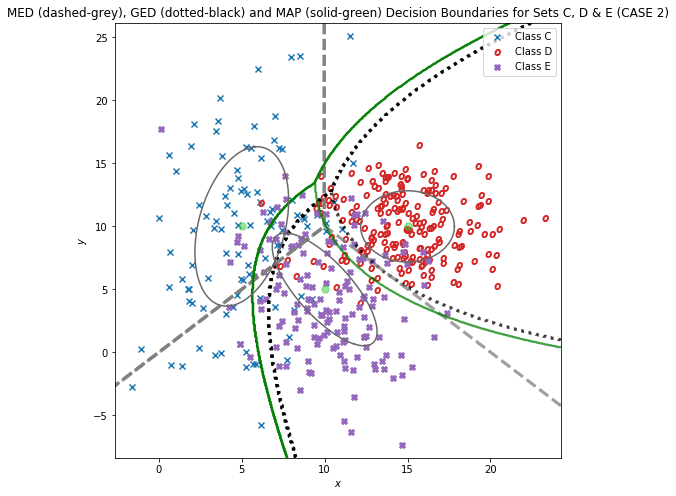

In [225]:
plt.figure(3, figsize=(8,8))
plt.contour(xx2, yy2, GED_dist2, alpha=0.5, linewidths=3, linestyles='dotted', colors=('black'))
plt.contour(xx2, yy2, MED_dist2, alpha=0.5, linewidths=3, linestyles='dashed', colors=('gray'))
plt.contour(xx2, yy2, MAP_val2, alpha=0.5, linewidths=2, linestyles='solid', colors=('green'))

plt.scatter(c_samples[:, 0], c_samples[:, 1], marker='x');
plt.scatter(d_samples[:, 0], d_samples[:, 1], c='tab:red', marker='$o$')
plt.scatter(e_samples[:, 0], e_samples[:, 1], c='tab:purple', marker='X')
plt.legend(("Class C", "Class D", "Class E"))

plt.plot(mu_c[0], mu_c[1], c='limegreen', marker='H', markersize=8, alpha=0.5)
plt.plot(mu_d[0], mu_d[1], c='limegreen', marker='H', markersize=8, alpha=0.5)
plt.plot(mu_e[0], mu_e[1], c='limegreen', marker='H', markersize=8, alpha=0.5)

plt.plot(ellipse_c_x, ellipse_c_y, color='dimgrey')
plt.plot(ellipse_d_x, ellipse_d_y, color='dimgrey')
plt.plot(ellipse_e_x, ellipse_e_y, color='dimgrey')

plt.title("MED (dashed-grey), GED (dotted-black) and MAP (solid-green) Decision Boundaries for Sets C, D & E (CASE 2)")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim([x2_min, x2_max])
plt.ylim([y2_min, y2_max]);

## Part 4
### kNN: Case 1 and Case 2

In [ ]:
def fiveNNMinDistance(point, class1, class2, class3):
    class_number = None
    class_data = [class1, class2]
    values = []
    if class3 is not None:
        class_data.append(class3)
        
    min_distances = [[None, None, None, None, None], [None, None, None, None, None], [None, None, None, None, None]]    
    min_data = [[None, None, None, None, None], [None, None, None, None, None], [None, None, None, None, None]]
    # Go through every sample in each class  and check if it's smaller than any of the 5 minimum
    # distances that we are keeping track of
    for class_i, data in enumerate(class_data):
        for i, d in enumerate(data):
            new_d = np.linalg.norm(point-d)
            for j, min_d in enumerate(min_distances[class_i]):
                if min_d is None:
                    min_distances[class_i][j] = new_d
                    min_data[class_i][j] = d
                    break
                elif new_d < min_d:
                    min_distances[class_i][j] = new_d
                    min_data[class_i][j] = d
                    new_d = min_d
                    
        # calcualate mean of the 5 NNs
        class_mu = np.array(min_data[class_i]).sum(axis=0) / 5.0
        values.append(np.linalg.norm(np.array(point) - class_mu))
    
    index_min = np.argmin(values)
    #class 1 
    if (index_min==0):
        class_number = 0 if class3 is None else -1
    #class 2
    elif (index_min==1):
        class_number = 1 if class3 is None else 2
    #class 3
    elif (index_min==2):
        class_number = 3
    
    return class_number

In [266]:
def fiveNN(X, Y, class1, class2, class3):
    dist = np.zeros((len(X), len(X[0])), dtype=np.int)
    for i in range(len(X)):
        for j in range(len(X[0])):
            classifier = [X[i,j], Y[i,j]]
            n = fiveNNMinDistance(classifier, class1, class2, class3)
            dist[i,j] = n

    return dist

fiveNN_dist = fiveNN(xx1, yy1, a_samples, b_samples, None)
fiveNN_dist_3 = fiveNN(xx2, yy2, c_samples, d_samples, e_samples)

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:909: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'edgecolors'
  s)


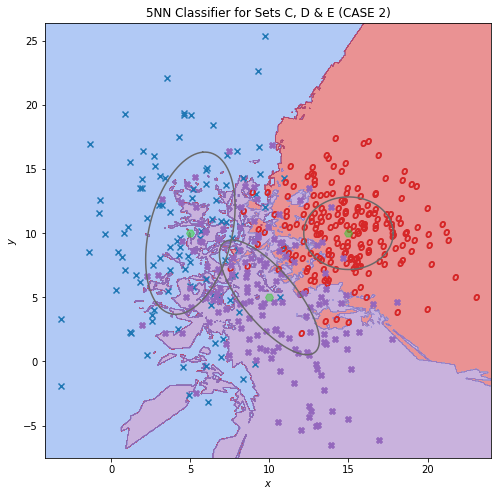

In [269]:
# plt.figure(11, figsize=(8,8))
# plt.contour(xx1, yy1, NN_dist, alpha=0.5, linewidths=1, linestyles='solid', colors=('black'))
# plt.contour(xx1, yy1, fiveNN_dist, alpha=0.5, linewidths=0.5, linestyles='solid', colors=('orange'))
# plt.scatter(a_samples[:, 0], a_samples[:, 1], marker='x');
# plt.scatter(b_samples[:, 0], b_samples[:, 1], c='tab:red', marker='$o$')
# plt.legend(("Class A", "Class B"))
# plt.title("NN (black) and 5NN (orange) Decision Boundaries for Sets A & B (CASE 1)")
# plt.xlabel('$x$')
# plt.ylabel('$y$')
# plt.legend(("Class A", "Class B"))
# plt.xlim([x1_min, x1_max])
# plt.ylim([y1_min, y1_max]);


# plt.figure(12, figsize=(8,8))
# plt.contour(xx2, yy2, NN_dist_3, alpha=0.5, linewidths=1 , linestyles='solid', colors=('black'))
# plt.contour(xx2, yy2, fiveNN_dist_3, alpha=0.5, linewidths=0.5, linestyles='solid', colors=('orange'))
# plt.scatter(c_samples[:, 0], c_samples[:, 1], marker='x');
# plt.scatter(d_samples[:, 0], d_samples[:, 1], c='tab:red', marker='$o$')
# plt.scatter(e_samples[:, 0], e_samples[:, 1], c='tab:purple', marker='X')
# plt.legend(("Class C", "Class D", "Class E"))
# plt.title("NN (black) and 5NN (orange) Decision Boundaries for Sets C, D & E (CASE 2)")
# plt.xlabel('$x$')
# plt.ylabel('$y$')
# plt.xlim([x2_min, x2_max])
# plt.ylim([y2_min, y2_max]);

plt.figure(3, figsize=(8,8))
plt.contourf(xx2, yy2, fiveNN_dist_3, colors=('cornflowerblue','tab:purple', 'tab:red' ), edgecolors='face', linewidths='10', alpha=0.5)
plt.scatter(c_samples[:, 0], c_samples[:, 1], marker='x');
plt.scatter(d_samples[:, 0], d_samples[:, 1], c='tab:red', marker='$o$')
plt.scatter(e_samples[:, 0], e_samples[:, 1], c='tab:purple', marker='X')

plt.plot(mu_c[0], mu_c[1], c='limegreen', marker='H', markersize=8, alpha=0.5)
plt.plot(mu_d[0], mu_d[1], c='limegreen', marker='H', markersize=8, alpha=0.5)
plt.plot(mu_e[0], mu_e[1], c='limegreen', marker='H', markersize=8, alpha=0.5)

plt.plot(ellipse_c_x, ellipse_c_y, color='dimgrey')
plt.plot(ellipse_d_x, ellipse_d_y, color='dimgrey')
plt.plot(ellipse_e_x, ellipse_e_y, color='dimgrey')

plt.title("5NN Classifier for Sets C, D & E (CASE 2)")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim([x2_min, x2_max])
plt.ylim([y2_min, y2_max]);


## Error Analysis

### Confusion Matrix

Use the getConfusionMatrix() method by passing in the desired distribution from above. See demo below

In [267]:
def classify(input_vec, dist, X, Y, h):
    xs = X[0]
    if input_vec[0] <= xs[0]:
        i = 0
    elif input_vec[0] >= xs[-1]:
        i = len(xs) - 1
    else:
        i = int(round((input_vec[0] - xs[0]) / h))
    
    ys = Y[:,0]
    if input_vec[1] <= ys[0]:
        j = 0
    elif input_vec[1] >= ys[-1]:
        j = len(ys) - 1
    else:
        j = int(round((input_vec[1] - ys[0]) / h))
    
    return dist[j][i]
    
def getConfusionMatrix(dist, classes, labels, X, Y, h):
    dim = len(classes)
    cm = np.zeros((dim, dim + 1))
    for i, cls in enumerate(classes):
        for j, data in enumerate(cls):   
            result = labels.index(classify(data, dist, X, Y, h))
            cm[i][result] += 1
    return cm

# For Case 1:
print(getConfusionMatrix(MED_dist, [a_samples, b_samples], [-1, 1, 0], xx1, yy1, h1))
print(getConfusionMatrix(GED_dist, [a_samples, b_samples], [-1, 2, 0], xx1, yy1, h1))
print(getConfusionMatrix(MAP_val1, [a_samples, b_samples], [0, 1], xx1, yy1, h1))
print(getConfusionMatrix(NN_dist, [a_test, b_test], [0, 1], xx1, yy1, h1))
print(getConfusionMatrix(fiveNN_dist, [a_test, b_test], [0, 1], xx1, yy1, h1))
print()
# For Case 2:
print(getConfusionMatrix(MED_dist2, [c_samples, d_samples, e_samples], [-1, 2, 3], xx2, yy2, h2))
print(getConfusionMatrix(GED_dist2, [c_samples, d_samples, e_samples], [-1, 2, 3], xx2, yy2, h2))
print(getConfusionMatrix(MAP_val2, [c_samples, d_samples, e_samples], [-1, 2, 3], xx2, yy2, h2))
print(getConfusionMatrix(NN_dist_3, [c_test, d_test, e_test], [-1, 2, 3], xx2, yy2, h2))
print(getConfusionMatrix(fiveNN_dist_3, [c_test, d_test, e_test], [-1, 2, 3], xx2, yy2, h2))


# print(classify([15, 20], xx1, yy1, fiveNN_dist, h1))
# print(classify([15, 5.46], xx1, yy1, fiveNN_dist, h1))
# print(classify([0, 3.46], xx1, yy1, fiveNN_dist, h1))
# print(classify([-1, 20], xx1, yy1, fiveNN_dist, h1))


[[186.  14.   0.]
 [ 17. 183.   0.]]
[[188.  12.   0.]
 [ 14. 186.   0.]]


IndexError: index 373 is out of bounds for axis 0 with size 362